In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
test.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
train.drop(['id','keyword', 'location'], axis = 1, inplace = True)
test.drop(['keyword', 'location'], axis = 1, inplace = True)

In [7]:
train

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


<AxesSubplot:ylabel='target'>

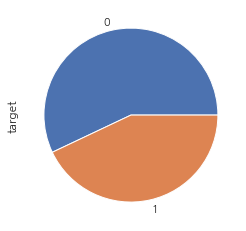

In [8]:
train.target.value_counts().plot.pie()

# Data prepare

In [9]:
import re
import nltk
from nltk.corpus import stopwords

stop = stopwords.words('english')
#어간을 추출
stemmer = nltk.SnowballStemmer('english')

In [10]:
def remove_else(text):
    t = str(text).lower()
    t = re.sub(r'@\s+|http\s+|\n', '', t) #링크 제거, @공백(1번이상) or http공백(1번이상) or 한 칸뛰기
    t = re.sub(r'amp','',t) #r은 문자열이 해당 문자열과 일치함을 나타냄
    t = re.sub('@[a-z0-9]+','user',t) #@name제거
    t = re.sub(r'[^A-Za-z0-9\s]+','',t) #A-Z, a-z, 0-9 또는 공백이 아닌 문자가 한 번이상 나올경우
    t = [stemmer.stem(word) for word in t.split()]
    t = [word for word in t if word not in stop]
    t = " ".join(t)
    return t
    

In [11]:
train['text'] = train['text'].apply(remove_else)
train

,text,target
0,deed reason earthquak may allah forgiv us,1
1,forest fire near la rong sask canada,1
2,resid ask shelter place notifi offic evacu she...,1
3,13000 peopl receiv wildfir evacu order california,1
4,got sent photo rubi alaska smoke wildfir pour ...,1
...,...,...
7608,two giant crane hold bridg collaps nearbi home...,1
7609,userahrari user control wild fire california e...,1
7610,m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj,1
7611,polic investig ebik collid car littl portug eb...,1


In [12]:
test['text'] = test['text'].apply(remove_else)
test

,id,text
0,0,happen terribl car crash
1,2,heard earthquak differ citi stay safe everyon
2,3,forest fire spot pond gees flee across street ...
3,9,apocalyps light spokan wildfir
4,11,typhoon soudelor kill 28 china taiwan
...,...,...
3258,10861,earthquak safeti los angel safeti fasten xrwn
3259,10865,storm ri wors last hurrican city3oth hardest h...
3260,10868,green line derail chicago httptcoutbxlcbiuy
3261,10874,meg issu hazard weather outlook hwo httptco3x6...


In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [32]:
#교차 검증
tfidf = TfidfVectorizer(decode_error = 'ignore')

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

from sklearn.pipeline import Pipeline

In [33]:
X = train['text']
y = train['target']

In [34]:
pipe = Pipeline([('tfidf', tfidf), ('nb', model)])

In [35]:
m = pipe.fit(X, y)

In [37]:
pred = m.predict(test['text'])

In [38]:
test2 = pd.read_csv('test.csv')

In [39]:
pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [40]:
submission = pd.DataFrame( {
    "id" : test2['id'],
    "target":pred
})

In [41]:
submission.to_csv("nlp_submission.csv",index=False)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
result = pd.read_csv('nlp_submission.csv')
result